# ETFと利回りのデータを比較する
[stooq](https://stooq.pl/)よりデータを取得します。

In [1]:
# Google　Colaboratory で実行する場合はインストールする
if "google.colab" in str(get_ipython()):
    !pip install japanize_matplotlib
    !pip install mplfinance
    !pip install pandas_datareader

In [2]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import japanize_matplotlib
from IPython.display import display, HTML
from utils import get_finance_data, get_rsi

## ETF
- [pandas.DataFrame.sort_index](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_index.html)

In [3]:
# 銘柄名、期間、保存先ファイル
start = "2021-08-01"
end = "2022-01-31"

# データを取得する
voo = get_finance_data("VOO", source="stooq", start=start, end=end)
display(HTML(f"<h1>VOO</h1>"))
display(voo.head())

vti = get_finance_data("VTI", source="stooq", start=start, end=end)
display(HTML(f"<h1>VTI</h1>"))
display(vti.head())

spx = get_finance_data("^SPX", source="stooq", start=start, end=end)
display(HTML(f"<h1>S&P500</h1>"))
display(spx.head())

ndq = get_finance_data("^NDQ", source="stooq", start=start, end=end)
display(HTML(f"<h1>Nasdaq</h1>"))
display(ndq.head())

,Open,High,Low,Close,Volume
Date,,,,,
2022-01-31,405.67,413.9700,404.3500,413.69,9200435
2022-01-28,397.82,406.3300,393.3000,406.26,12096807
2022-01-27,402.93,405.9700,394.8200,396.54,12455226
2022-01-26,405.66,408.1954,394.3400,398.56,14377346
2022-01-25,398.17,404.2600,392.7325,399.46,16836326


,Open,High,Low,Close,Volume
Date,,,,,
2022-01-31,222.09,226.950,221.22,226.81,5306436
2022-01-28,217.50,222.170,214.93,222.09,4961209
2022-01-27,220.81,222.400,215.90,216.75,5791524
2022-01-26,222.72,224.160,216.05,218.37,7096416
2022-01-25,219.10,222.015,215.64,219.22,6600378


,Open,High,Low,Close,Volume
Date,,,,,
2022-01-31,4431.79,4516.89,4414.02,4515.55,2960132803
2022-01-28,4336.19,4432.72,4292.46,4431.85,2926083817
2022-01-27,4380.58,4428.74,4309.50,4326.51,3070684348
2022-01-26,4408.43,4453.23,4304.80,4349.93,3239353450
2022-01-25,4366.64,4411.01,4287.11,4356.45,3069079477


,Open,High,Low,Close,Volume
Date,,,,,
2022-01-31,13812.20,14242.90,13767.71,14239.88,3268652504
2022-01-28,13436.71,13771.91,13236.55,13770.57,3092819850
2022-01-27,13710.99,13765.91,13322.66,13352.78,3373437394
2022-01-26,13871.77,14002.65,13392.19,13542.12,3664304374
2022-01-25,13610.87,13781.63,13414.14,13539.29,3265336637


## 債権利回り

In [4]:
usy10 = get_finance_data("10USY.B", source="stooq", start=start, end=end)
display(HTML(f"<h1>10-Year U.S. Bond Yield</h1>"))
display(usy10.head())

usy2 = get_finance_data("2USY.B", source="stooq", start=start, end=end)
display(HTML(f"<h1>2-Year U.S. Bond Yield</h1>"))
display(usy2.head())

,Open,High,Low,Close
Date,,,,
2022-01-31,1.789,1.816,1.771,1.780
2022-01-28,1.830,1.848,1.773,1.777
2022-01-27,1.840,1.851,1.783,1.799
2022-01-26,1.769,1.876,1.769,1.867
2022-01-25,1.753,1.792,1.735,1.776


,Open,High,Low,Close
Date,,,,
2022-01-31,1.1986,1.2145,1.1587,1.1827
2022-01-28,1.2141,1.2260,1.1603,1.1703
2022-01-27,1.1822,1.2061,1.1603,1.1882
2022-01-26,1.0313,1.1603,1.0154,1.1544
2022-01-25,1.0055,1.0353,0.9897,1.0254


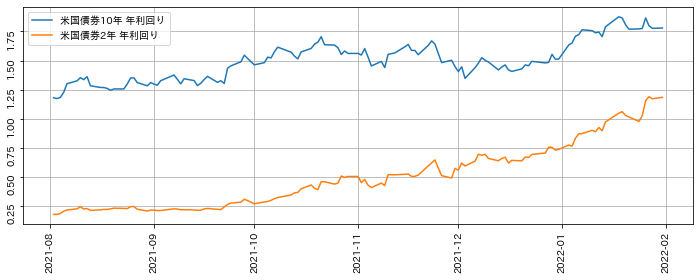

In [5]:
plt.figure(figsize=(12, 4))
plt.plot(usy10.Close, label="米国債券10年 年利回り")
plt.plot(usy2.Close, label="米国債券2年 年利回り")
plt.legend()
plt.tick_params(rotation=90)
plt.grid()
plt.show()

## S&P500と１０年債利回りの比較
- [Invert Axes](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/invert_axes.html)

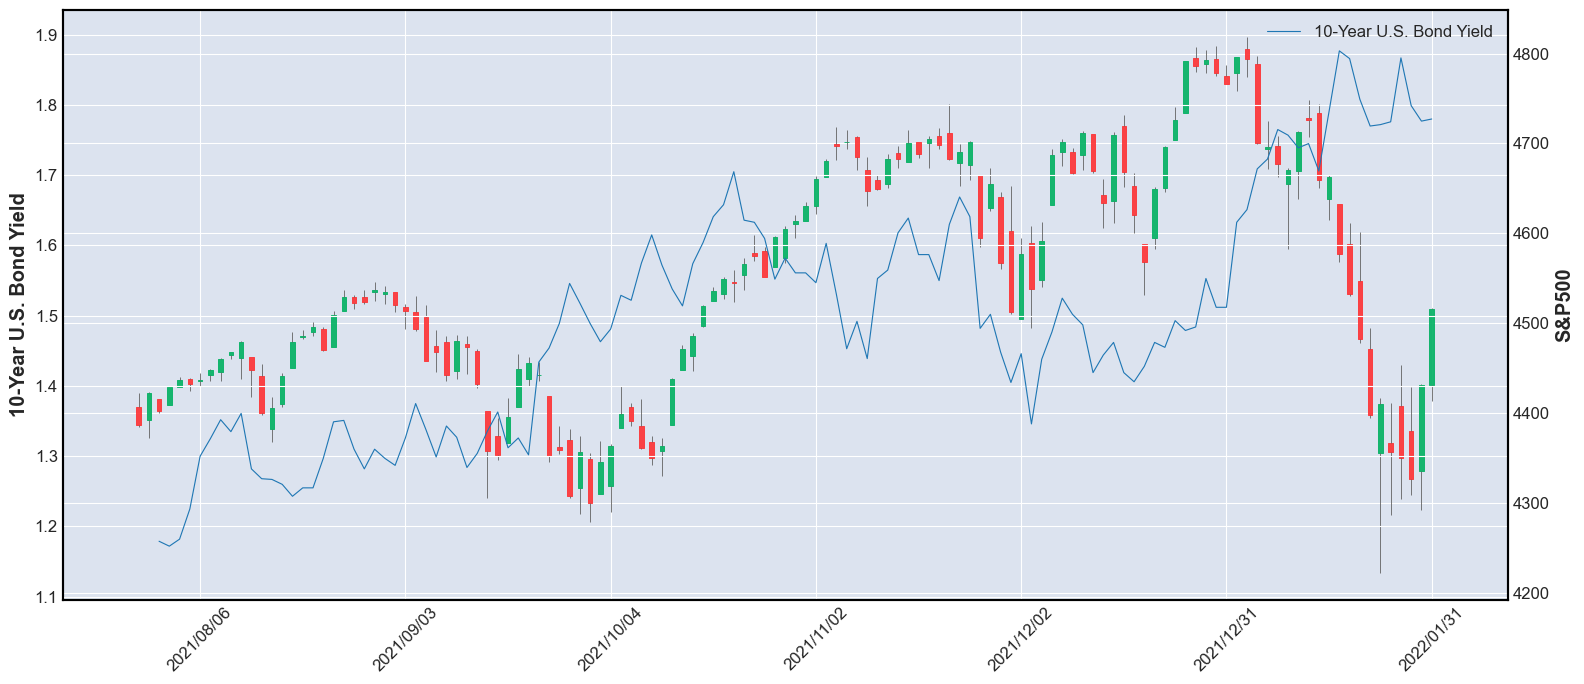

In [6]:
import mplfinance as mpf

fig = mpf.figure(figsize=(16, 7), tight_layout=True, style="default")

ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
mpf.plot(spx, type="candle", style="yahoo", datetime_format="%Y/%m/%d", ax=ax1)
ax1.set_ylabel("S&P500")
ax1.invert_xaxis()

mpf.plot(
    usy10,
    type="line",
    style="starsandstripes",
    datetime_format="%Y/%m/%d",
    ax=ax2,
)

# 左側にラベルを表示する
ax2.tick_params(labelleft=True, labelright=False)
ax2.set_ylabel("10-Year U.S. Bond Yield")
ax2.yaxis.set_label_position("left")
ax2.legend(["10-Year U.S. Bond Yield"])